In [44]:
import os, sys
sys.path.append(os.path.dirname(os.getcwd()) + '/source')

import pickle
import numpy as np
import matplotlib.pyplot as plt
from simulation import simulate_emission_quadratic, simulate_log_damage
from numba import njit

np.random.seed(0)

In [33]:
# Model parameters
δ = 0.01
η = 0.032
median = 1.75/1000
h_hat = 0.2
σ_n = 1.2
γ_base = 0.018
ξ = 8*δ*η
r0 = 1500
T = 200

with open("../data/pulse_experiment", "rb") as f:
    λ_u = pickle.load(f)

λ_u = np.mean(λ_u, axis=0)

In [8]:
args_trace_ϕ = (-20, -5, 3000, 1e-9, 1e-3)
Et, r_grid, _, e_grid  = simulate_emission_quadratic(δ, η, median*γ_base, ξ, σ_n, # Replace σ_n with 0 if you want to set τ_2 = 0.
                                     args_trace_ϕ=args_trace_ϕ,
                                     r_start=r0, T=T)

In [45]:
@njit
def simulate_damage(λ_u, Et, σ_n, Ws, T, N):
    log_n = np.zeros((N, T+1))
    for n in range(N):
        for J in range(1, T+1):
            temp = 0
            for j in range(1, J+1):
                temp += λ_u[j] * (Et[J-j]*(1+σ_n@Ws[n, J-j]))
            log_n[n, J] = temp
    return log_n

In [ ]:
@njit
def simulate_z(T, N):
    

In [ ]:
@njit
def simulate_capital(ioverk, Ws, zt, alpha_k, beta, sigma_k, kappa, k0, Ht=0, T=102,):
    _, path, time = dW.shape
    Kt = np.zeros((path, time))
    i = invkap
     # log capital
    Kt[:, 0] = np.log(k0)
    k = np.log(k0)*np.ones(path)
    for t in range(time-1):
        k +=   alpha_k + beta*zt[:,t] + i - kappa/2*i**2 - .5*sigma_k[0]**2 + np.dot(sigma_k, Ht + dW[:, :, t])
        Kt[:,t+1] = k

    return Kt

In [54]:
T=100
N=1_000_000
Ws = np.random.normal(0, 1, (N, T))
log_n = simulate_damage(λ_u*γ_base/1000, Et, np.array([0, 0, σ_n]), Ws, T, N)

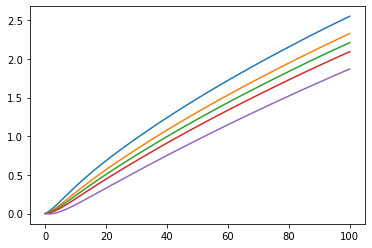

In [56]:
plt.plot(np.percentile(log_n*100, 90, axis=0))
plt.plot(np.percentile(log_n*100, 67, axis=0))
plt.plot(np.percentile(log_n*100, 50, axis=0))
plt.plot(np.percentile(log_n*100, 33, axis=0))
plt.plot(np.percentile(log_n*100, 10, axis=0))

In [57]:
np.percentile(log_n*100, 10, axis=0)

array([ 0.        , -0.00519029, -0.00308572,  0.00349299,  0.01366938,
        0.0267323 ,  0.04201085,  0.05891804,  0.07718863,  0.09657108,
        0.11663293,  0.13709667,  0.1580525 ,  0.17921078,  0.20083089,
        0.22231854,  0.24389176,  0.26550615,  0.28722966,  0.30878266,
        0.33032858,  0.35176395,  0.37335492,  0.39493629,  0.41638241,
        0.43786752,  0.45907831,  0.48025663,  0.50134357,  0.52258042,
        0.54388018,  0.56513333,  0.58617526,  0.60712401,  0.62815791,
        0.64903365,  0.66999734,  0.69073671,  0.71137463,  0.73205685,
        0.752602  ,  0.77295507,  0.79349142,  0.81375419,  0.83407048,
        0.8542787 ,  0.87450942,  0.89453002,  0.91448361,  0.93435995,
        0.95433162,  0.97431961,  0.99395945,  1.01377464,  1.03346149,
        1.05308683,  1.0724047 ,  1.09179985,  1.11131613,  1.13057164,
        1.14976602,  1.16901166,  1.18810665,  1.20712089,  1.2260825 ,
        1.24497993,  1.26386132,  1.28266472,  1.30141673,  1.31